In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from dateutil import parser


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


print('Library Loaded')

Library Loaded


/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [9]:
#  Heart Disease in Patients from Cleveland.
# https://www.mldata.io/dataset-details/heart_disease/
# 1=male; 0=female
# predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE
data = 'heart.csv'

In [10]:
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [12]:
df.shape

(303, 14)

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [14]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [15]:
print('# rows in dataset {0}'.format(len(df)))
print('===============================')

for col in cols:
    print('# rows in {1} with ZERO value: {0}'.format(len(df.loc[df[col]== 0]), col))

# rows in dataset 303
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 97
# rows in cp with ZERO value: 0
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 151
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 0
# rows in ca with ZERO value: 176
# rows in thal with ZERO value: 0
# rows in num with ZERO value: 164


In [16]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [19]:
df = df.rename(columns={"num": "target"})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


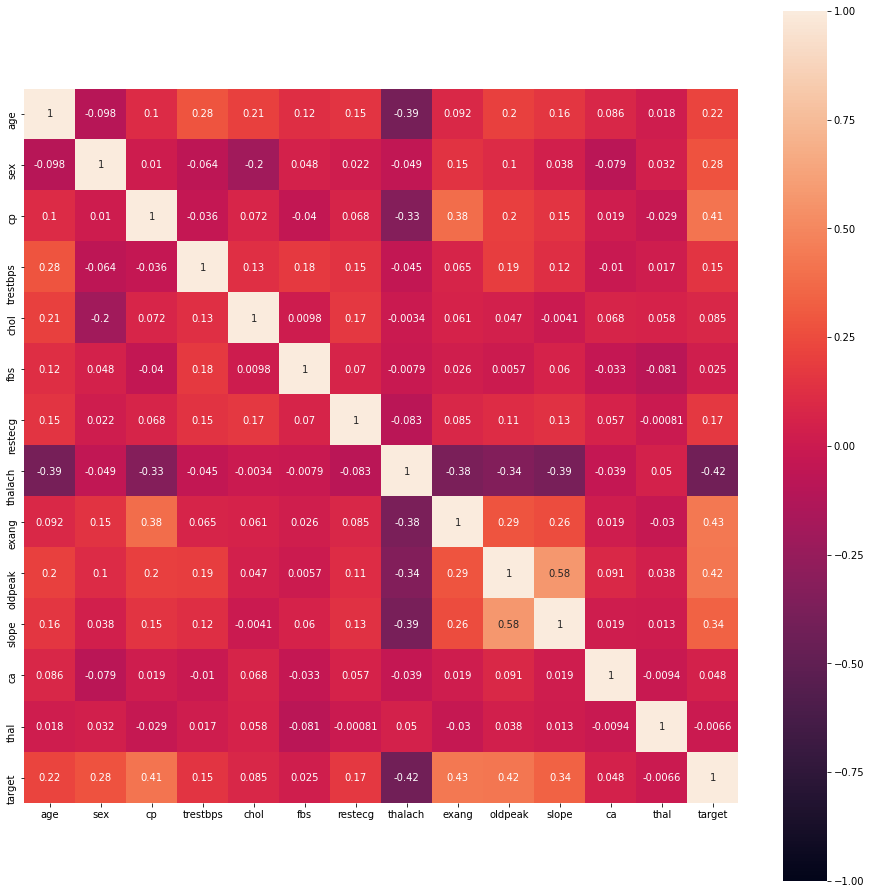

In [20]:
# Visualization

corrmat = df.corr()
fig = plt.figure(figsize = (16, 16))

sns.heatmap(corrmat, vmax = 1, square = True, annot = True, vmin= -1)
plt.show()


/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/pandas/plot

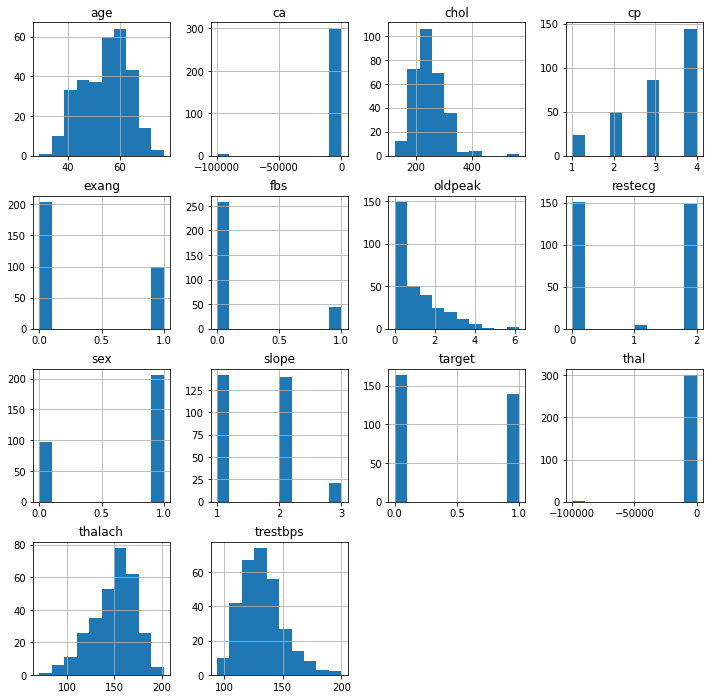

In [21]:
df.hist(figsize = (12, 12))
plt.show()

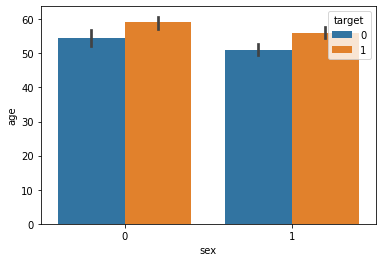

In [22]:
sns.barplot(x='sex', y='age', hue='target', data=df)

/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Lina/opt/anaconda3/lib/pytho

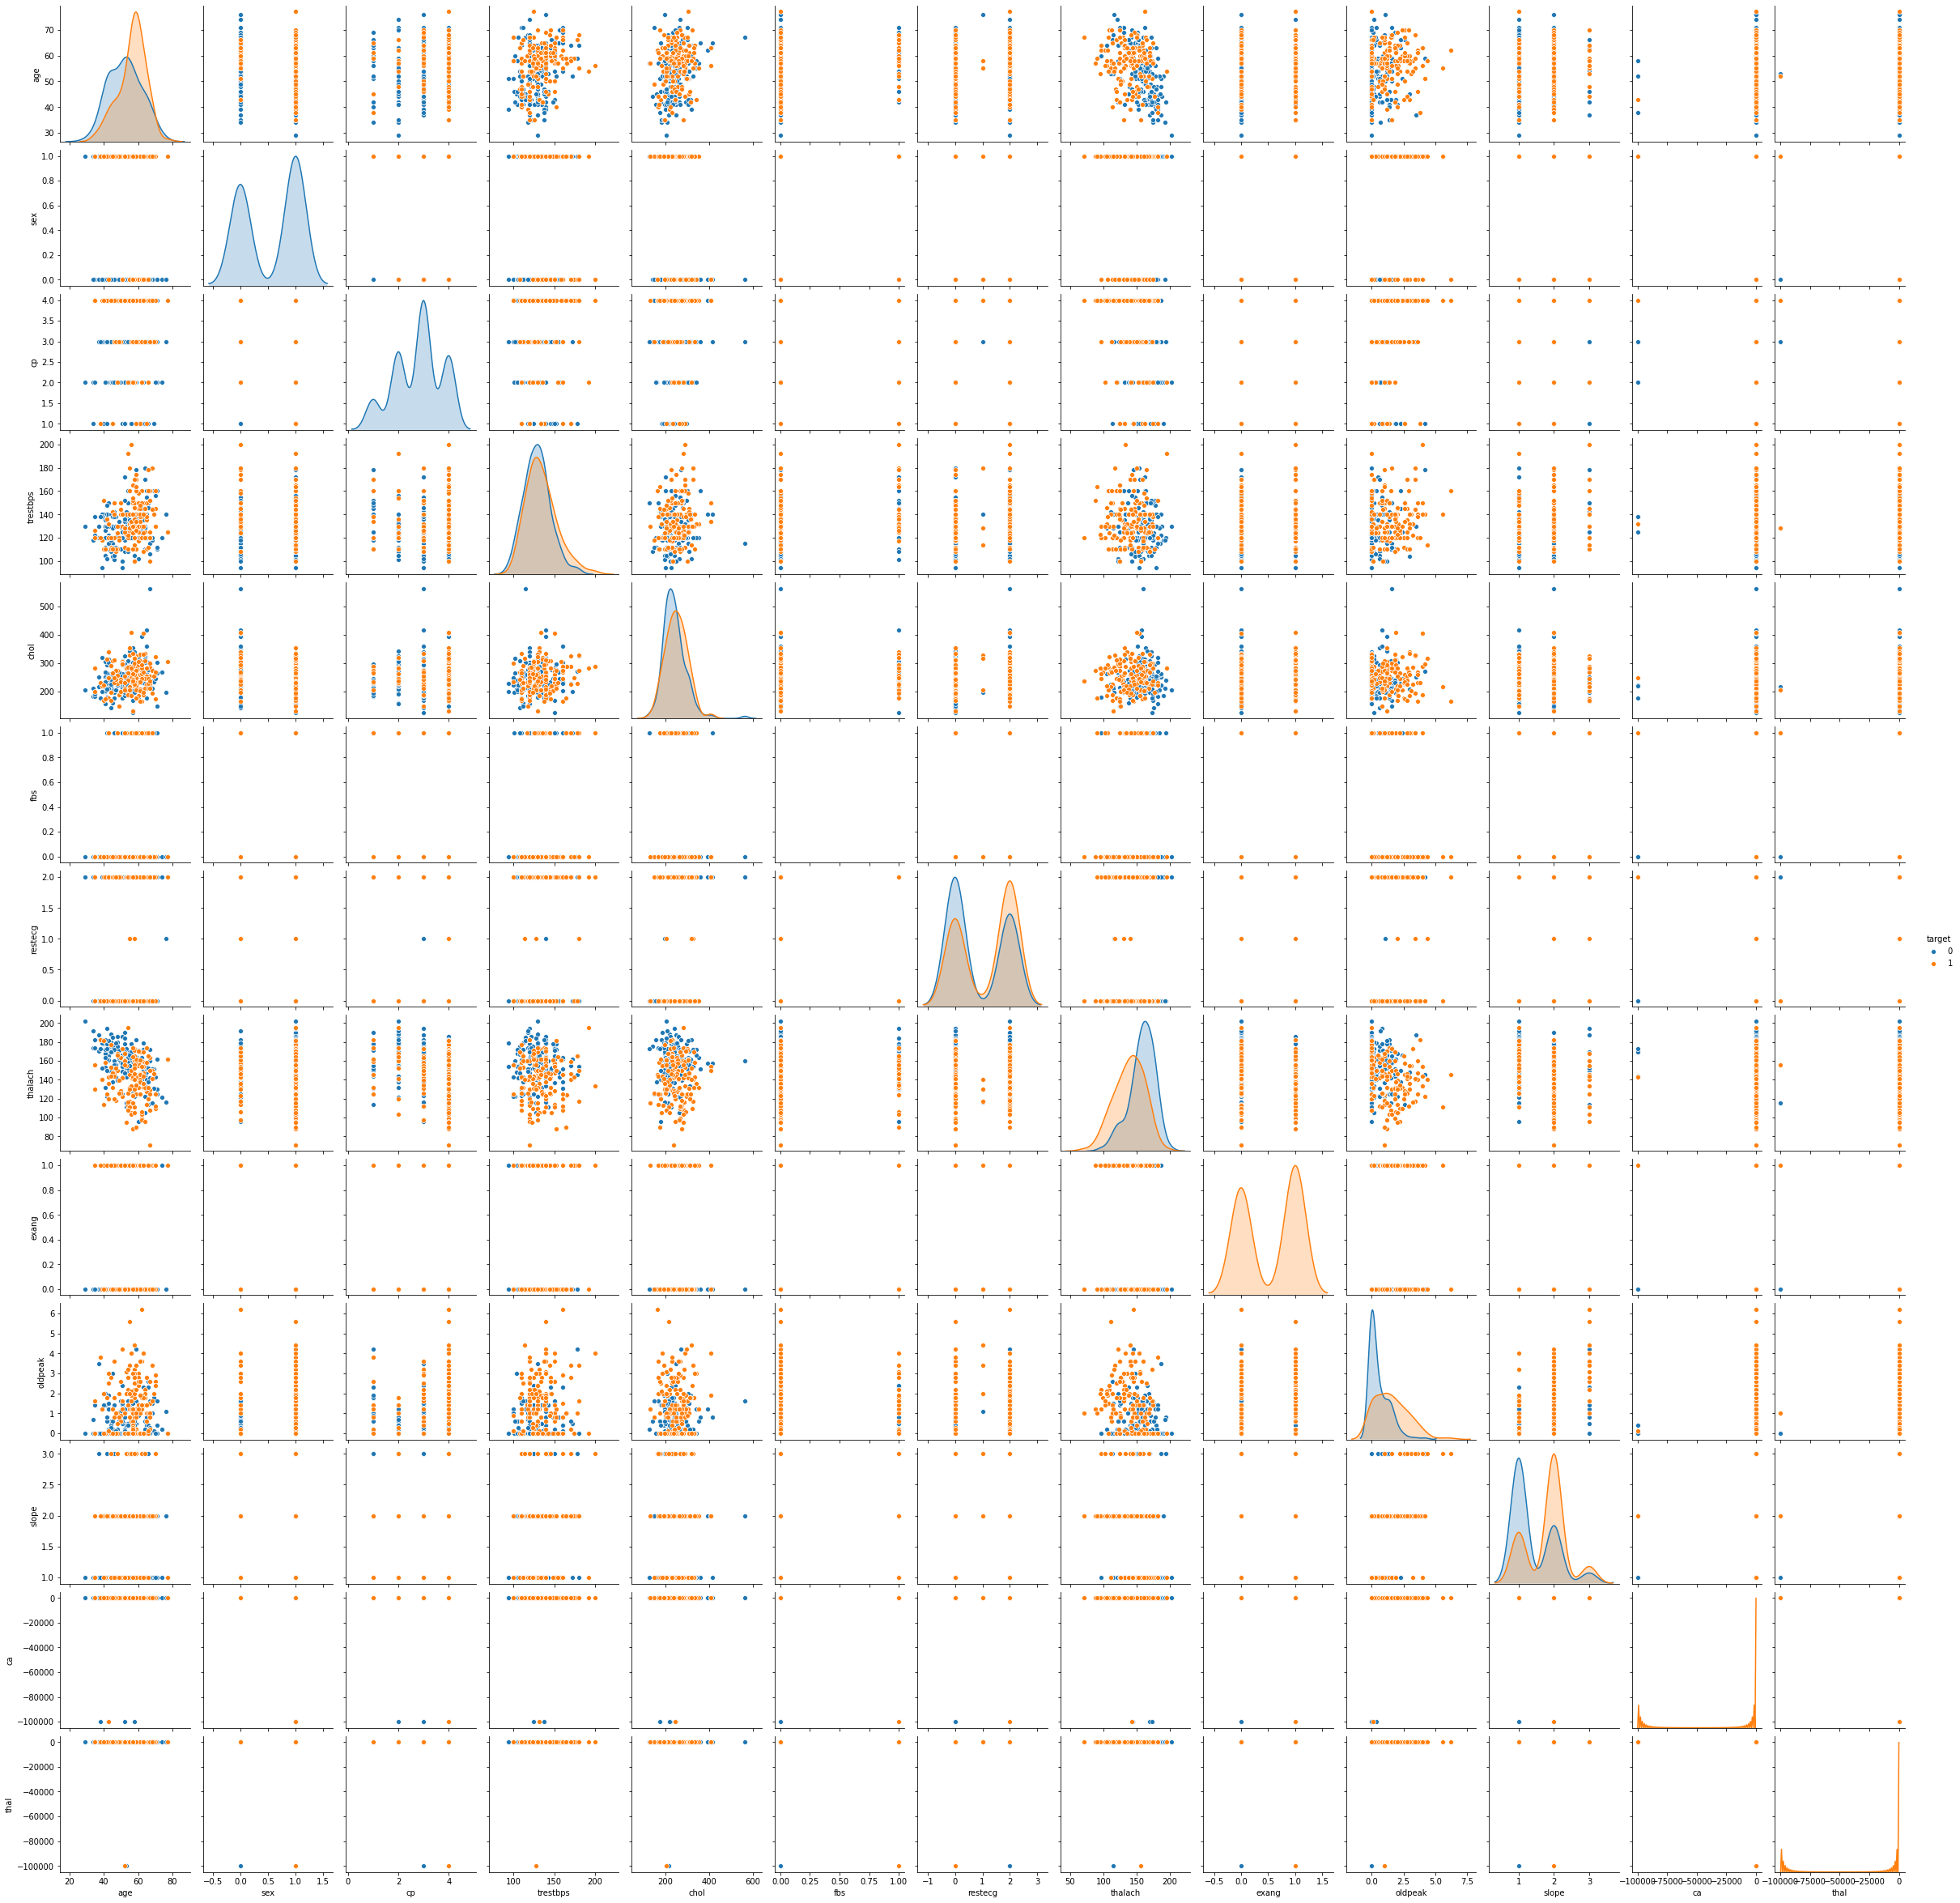

In [23]:
sns.pairplot(df, hue='target',)




In [29]:
X = df.drop('target', axis = 1)
from sklearn.manifold import TSNE
import time
time_start = time.time()
print(time_start)

df_tsne = TSNE(random_state=10).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

1592957852.143111
t-SNE done! Time elapsed: 1.970073938369751 seconds


In [32]:
df_tsne

array([[  2.0007324 ,   0.24844562],
       [-12.029026  ,  15.606147  ],
       [ 17.736412  ,  -4.9546223 ],
       [ -9.481301  ,  -5.8363733 ],
       [  7.5476823 , -16.974148  ],
       [ -5.4272594 ,  -5.345256  ],
       [-12.315846  ,   6.724011  ],
       [-28.946558  ,  22.084032  ],
       [ -2.3945022 ,   6.5534706 ],
       [ 14.125428  , -16.305553  ],
       [ 16.71761   , -16.661623  ],
       [-19.786463  ,  16.034225  ],
       [ -3.9538643 ,   7.3504944 ],
       [-11.527343  ,  -1.0019006 ],
       [  0.5675081 , -18.38329   ],
       [ 16.273449  , -22.705467  ],
       [  6.721321  ,  -7.6817813 ],
       [ -1.067994  ,  -3.2486901 ],
       [ -7.741682  ,   9.253552  ],
       [-10.794405  ,   1.5555421 ],
       [ 15.732099  ,  -6.771045  ],
       [-16.711077  ,  10.0363245 ],
       [-16.672268  ,  25.712227  ],
       [  1.0753227 ,  -9.037171  ],
       [ 19.70679   , -10.471588  ],
       [  7.3924437 ,  -9.679734  ],
       [-27.890112  ,  23.762827  ],
 

In [41]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    #     choose a color palette with seaborn
    num_classes = len( np.unique(colors))
    palette = np.array(sns.color_palette('deep', num_classes))
    
    # create a scatter plot
    f = plt.figure(figsize = (8,8))
    ax = plt.subplot(aspect = 'equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    # add the labels for each digit corresponding to the label
    txts = []
    
    for i in range(num_classes):
        
        # position of each label at median of data points
        xtext, ytext = np.median(x[colors == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
        txts.append(txt)
    
    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(0.49220288, -3.7130527, '0'), Text(-3.0184455, 6.412885, '1')])

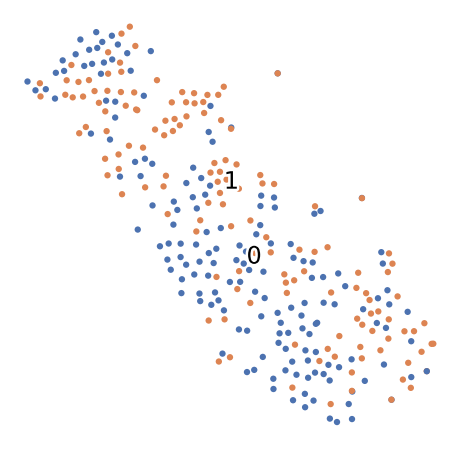

In [42]:
fashion_scatter(df_tsne, df.target)